<h1>Pandas</h1>


- Ultra populaire en data science
- Permet la manipulation de très gros tableaux de données (un genre d'Excel sous stéroïdes)
- Enormement de fonctionnalites (filtres, retraitements, analyses...)
- Permet de faire le pond avec d'autre librairie (ML, data viz..)

<h2> 1 - Créer un Dataframe </h2>

<h2>Navigation dans un dataframe</h2>

<h2>Faire des boucles dans un dataframe</h2>

In [26]:
for i in data:
    print(i)

band_name
fans
formed
origin
split
style


In [27]:
for i in data['band_name'].head(5):
    print(i)

Iron Maiden
Opeth
Metallica
Megadeth
Amon Amarth


In [28]:
for row_index,row in data.head(5).iterrows():
    print (row_index)
    print(row)

0
band_name                        Iron Maiden
fans                                    4195
formed                                  1975
origin                        United Kingdom
split                                      -
style        New wave of british heavy,Heavy
Name: 0, dtype: object
1
band_name                                               Opeth
fans                                                     4147
formed                                                   1990
origin                                                 Sweden
split                                                    1990
style        Extreme progressive,Progressive rock,Progressive
Name: 1, dtype: object
2
band_name                Metallica
fans                          3712
formed                        1981
origin                         USA
split                            -
style        Heavy,Bay area thrash
Name: 2, dtype: object
3
band_name                  Megadeth
fans                           3105

In [29]:
for row_index,row in data.head(5).iterrows():
    print (row_index)
    print(row['band_name'])
    print(row['fans'])

0
Iron Maiden
4195
1
Opeth
4147
2
Metallica
3712
3
Megadeth
3105
4
Amon Amarth
3054


In [30]:
for key,value in data.head(5).iteritems():
    print(key)
    print(value)

band_name
0    Iron Maiden
1          Opeth
2      Metallica
3       Megadeth
4    Amon Amarth
Name: band_name, dtype: object
fans
0    4195
1    4147
2    3712
3    3105
4    3054
Name: fans, dtype: int64
formed
0    1975
1    1990
2    1981
3    1983
4    1988
Name: formed, dtype: object
origin
0    United Kingdom
1            Sweden
2               USA
3               USA
4            Sweden
Name: origin, dtype: object
split
0       -
1    1990
2       -
3    1983
4       -
Name: split, dtype: object
style
0                     New wave of british heavy,Heavy
1    Extreme progressive,Progressive rock,Progressive
2                               Heavy,Bay area thrash
3                              Thrash,Heavy,Hard rock
4                                       Melodic death
Name: style, dtype: object


In [31]:
data.head(5)

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death


<h2>Les premières analyses<h2>

In [47]:
data['fans'].head(5)

0    4195
1    4147
2    3712
3    3105
4    3054
Name: fans, dtype: int64

In [48]:
print(data['fans'].max())
print(data['fans'].min())
print(data['fans'].mean())

4195
0
470.7478813559322


In [49]:
data.describe()

,index,fans,formed,split
count,472.000000,472.000000,472.000000,267.000000
mean,531.887712,470.747881,1994.957627,1996.359551
std,646.576536,583.621258,9.466350,10.246489
min,0.000000,0.000000,1964.000000,1967.000000
25%,174.500000,117.750000,1989.000000,1990.000000
50%,334.500000,259.000000,1996.000000,1996.000000
75%,609.750000,588.750000,2003.000000,2003.000000
max,4973.000000,4195.000000,2015.000000,2016.000000


In [50]:
data['origin'].unique()

array(['United Kingdom', 'Sweden', 'USA', 'Finland', 'Germany', 'Poland',
       'Norway', 'The Netherlands', 'Switzerland', 'France', 'Brazil',
       'Portugal', 'Australia', 'Italy', 'United Kingdom, USA', 'Greece',
       'Austria', 'Canada', 'Israel', 'Denmark, USA', 'Ireland',
       'Faroe Islands', 'Denmark', 'Russia', 'Ukraine',
       'Israel, The Netherlands', 'Iceland', 'Andorra', 'Tunisia, France',
       'Belgium', 'Chile', 'Japan', 'Taiwan', nan, 'Hungary', 'Romania',
       'Jordan', 'Spain', 'Czech Republic', 'Iraq, USA', 'Saudi Arabia',
       'Iran'], dtype=object)

In [51]:
len(data['origin'].unique())

42

In [52]:
data.groupby('origin').count().head(5)

,index,band_name,fans,formed,split,style
origin,,,,,,
Andorra,1,1,1,1,1,1
Australia,9,9,9,9,4,9
Austria,4,4,4,4,3,4
Belgium,2,2,2,2,1,2
Brazil,5,5,5,5,1,5


In [53]:
data[['origin','fans']].groupby('origin').count().head(5)

,fans
origin,
Andorra,1
Australia,9
Austria,4
Belgium,2
Brazil,5


In [54]:
data[['origin','fans']].groupby('origin').count().sort_values(['fans'],ascending=False).head(10)

,fans
origin,
USA,130
Sweden,54
United Kingdom,43
Germany,41
Finland,40
Norway,29
Canada,19
Italy,12
France,10


In [55]:
data[['origin','formed','fans']].groupby(['formed','origin']).count().sort_values(['fans'],ascending=False).head(30)

,,fans
formed,origin,
1982.0,USA,7
2005.0,USA,7
1984.0,USA,6
1990.0,Sweden,6
2000.0,USA,6
2003.0,USA,6
1988.0,USA,6
2004.0,USA,6
1981.0,USA,6


In [56]:
data[data['origin'] == 'USA']

,index,band_name,fans,formed,origin,split,style
2,2,Metallica,3712,1981.0,USA,NaN,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983.0,USA,1983.0,"Thrash,Heavy,Hard rock"
5,5,Slayer,2955,1981.0,USA,1981.0,Thrash
6,6,Death,2690,1983.0,USA,2001.0,"Progressive death,Death,Progressive thrash"
7,7,Dream Theater,2329,1985.0,USA,1985.0,Progressive
14,14,Pantera,1920,1981.0,USA,2003.0,"Heavy,Groove thrash,Groove metal"
16,16,Agalloch,1881,1995.0,USA,2016.0,"Atmospheric black,Neofolk"
26,26,Kamelot,1520,1991.0,USA,NaN,Symphonic power
27,27,Tool,1506,1988.0,USA,1988.0,"Progressive,Alternative"
29,29,Testament,1500,1983.0,USA,1983.0,Bay area thrash


In [57]:
data[data['formed'] >= 2010]

,index,band_name,fans,formed,origin,split,style
276,409,Atoma,206,2011.0,Sweden,2011.0,"Post-metal,Post-rock"
298,455,Deafheaven,179,2010.0,USA,2010.0,"Atmospheric black,Post-metal,Shoegaze"
337,549,Gloryhammer,136,2010.0,United Kingdom,2010.0,Power
368,671,Avatarium,103,2013.0,Sweden,2013.0,Doom
369,679,Abbath,102,2015.0,Norway,2015.0,Black
397,869,Alkaloid,74,2014.0,Germany,2014.0,Extreme progressive
407,951,Batushka,64,2015.0,Poland,2015.0,"Black,Doom"
408,961,Amiensus,63,2010.0,USA,2010.0,"Melodic black,Progressive"
409,975,Adrenaline Mob,62,2011.0,USA,2011.0,Heavy
428,1227,Abyssal,43,2011.0,United Kingdom,2011.0,Blackened death


In [58]:
data[(data['formed'] >= 2010) & (data['origin'] == 'USA')]

,index,band_name,fans,formed,origin,split,style
298,455,Deafheaven,179,2010.0,USA,2010.0,"Atmospheric black,Post-metal,Shoegaze"
408,961,Amiensus,63,2010.0,USA,2010.0,"Melodic black,Progressive"
409,975,Adrenaline Mob,62,2011.0,USA,2011.0,Heavy
431,1294,A Pale Horse Named Death,40,2011.0,USA,NaN,"Doom,Gothic"
435,1372,Æther Realm,36,2010.0,USA,NaN,"Melodic death,Folk"
442,1559,Ævangelist,29,2010.0,USA,2010.0,Blackened death
450,1858,Act Of Defiance,21,2014.0,USA,NaN,"Heavy,Thrash"


In [60]:
print(data['fans'][(data['formed'] >= 2010) & (data['origin'] == 'USA')].mean())
print(data['fans'][(data['formed'] < 2010) & (data['origin'] == 'USA')].mean())

61.42857142857143
525.6341463414634


<h2> Modification de données et introduction au feature modeling <h2>

<h2> Rassembler plusieurs tableaux dans un dataframe <h2>

In [82]:
tab1 = data.iloc[:250,:]
tab2 = data.iloc[250:,:]
tab2.reset_index(inplace=True)

In [83]:
tab2.head()

,level_0,index,band_name,fans,formed,origin,split,style,duration,nombreDeStyles
0,250,354,Cavalera Conspiracy,243,2007.0,USA,NaN,[Thrash],NaN,unique
1,251,360,Fates Warning,242,1982.0,USA,NaN,"[Us power, Progressive]",NaN,multiples
2,252,361,Skid Row,240,1987.0,USA,1987.0,"[Heavy, Hard rock]",0.0,multiples
3,253,362,Unexpect,239,1996.0,Canada,2015.0,[Extreme avantgarde],19.0,unique
4,254,364,Kvelertak,238,2007.0,Norway,NaN,"[Blackened hardcore, Punk]",NaN,multiples


In [92]:
concat_tab = pd.concat([tab1,tab2])
concat_tab.head()

D:\Utilisateurs\guillaume\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,band_name,duration,fans,formed,index,level_0,nombreDeStyles,origin,split,style
0,Iron Maiden,NaN,4195,1975.0,0,NaN,multiples,United Kingdom,NaN,"[New wave of british heavy, Heavy]"
1,Opeth,0.0,4147,1990.0,1,NaN,multiples,Sweden,1990.0,"[Extreme progressive, Progressive rock, Progre..."
2,Metallica,NaN,3712,1981.0,2,NaN,multiples,USA,NaN,"[Heavy, Bay area thrash]"
3,Megadeth,0.0,3105,1983.0,3,NaN,multiples,USA,1983.0,"[Thrash, Heavy, Hard rock]"
4,Amon Amarth,NaN,3054,1988.0,4,NaN,unique,Sweden,NaN,[Melodic death]


In [90]:
concat_tab.reset_index(inplace=True,drop=True)
concat_tab.head()

,band_name,duration,fans,formed,index,level_0,nombreDeStyles,origin,split,style
0,Iron Maiden,NaN,4195,1975.0,0,NaN,multiples,United Kingdom,NaN,"[New wave of british heavy, Heavy]"
1,Opeth,0.0,4147,1990.0,1,NaN,multiples,Sweden,1990.0,"[Extreme progressive, Progressive rock, Progre..."
2,Metallica,NaN,3712,1981.0,2,NaN,multiples,USA,NaN,"[Heavy, Bay area thrash]"
3,Megadeth,0.0,3105,1983.0,3,NaN,multiples,USA,1983.0,"[Thrash, Heavy, Hard rock]"
4,Amon Amarth,NaN,3054,1988.0,4,NaN,unique,Sweden,NaN,[Melodic death]


In [93]:
df1 = data[['band_name','fans','formed']]
df2 = data[['band_name','origin','split','style']]

In [94]:
df1.head()

,band_name,fans,formed
0,Iron Maiden,4195,1975.0
1,Opeth,4147,1990.0
2,Metallica,3712,1981.0
3,Megadeth,3105,1983.0
4,Amon Amarth,3054,1988.0


In [96]:
dfFinal = df1.merge(df2, how='inner', left_on='band_name', right_on='band_name')
dfFinal.head()

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975.0,United Kingdom,NaN,"[New wave of british heavy, Heavy]"
1,Opeth,4147,1990.0,Sweden,1990.0,"[Extreme progressive, Progressive rock, Progre..."
2,Metallica,3712,1981.0,USA,NaN,"[Heavy, Bay area thrash]"
3,Megadeth,3105,1983.0,USA,1983.0,"[Thrash, Heavy, Hard rock]"
4,Amon Amarth,3054,1988.0,Sweden,NaN,[Melodic death]


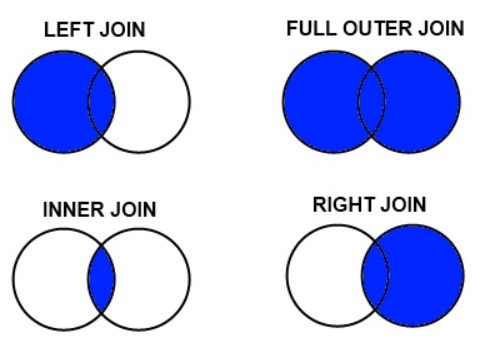

<h2>Gestion des dates dans un dataframe</h2>

In [101]:
import random
creationFiche = list(pd.date_range('1/1/2015', periods=len(data), freq='D').strftime('%d/%m/%Y'))
creationFiche = random.sample(creationFiche,len(creationFiche))

majFiche = list(pd.date_range('1/9/2017', periods=len(data), freq='D').strftime('%d/%m/%Y'))
majFiche = random.sample(majFiche,len(majFiche))

data['creationFiche'] = creationFiche
data['majFiche'] = majFiche
data['majFiche'] = 'update : '+ data['majFiche']
data

,index,band_name,fans,formed,origin,split,style,duration,nombreDeStyles,creationFiche,majFiche
0,0,Iron Maiden,4195,1975.0,United Kingdom,NaN,"[New wave of british heavy, Heavy]",NaN,multiples,23/01/2016,update : 08/07/2017
1,1,Opeth,4147,1990.0,Sweden,1990.0,"[Extreme progressive, Progressive rock, Progre...",0.0,multiples,23/07/2015,update : 13/10/2017
2,2,Metallica,3712,1981.0,USA,NaN,"[Heavy, Bay area thrash]",NaN,multiples,25/11/2015,update : 09/11/2017
3,3,Megadeth,3105,1983.0,USA,1983.0,"[Thrash, Heavy, Hard rock]",0.0,multiples,02/12/2015,update : 19/10/2017
4,4,Amon Amarth,3054,1988.0,Sweden,NaN,[Melodic death],NaN,unique,06/01/2015,update : 02/07/2017
5,5,Slayer,2955,1981.0,USA,1981.0,[Thrash],0.0,unique,23/02/2015,update : 30/09/2017
6,6,Death,2690,1983.0,USA,2001.0,"[Progressive death, Death, Progressive thrash]",18.0,multiples,28/01/2016,update : 05/03/2017
7,7,Dream Theater,2329,1985.0,USA,1985.0,[Progressive],0.0,unique,19/02/2015,update : 09/02/2018
8,8,Black Sabbath,2307,1968.0,United Kingdom,NaN,"[Doom, Heavy, Hard rock]",NaN,multiples,26/02/2016,update : 09/09/2017
9,9,Nightwish,2183,1996.0,Finland,1996.0,"[Symphonic power, Gothic, Symphonic]",0.0,multiples,27/05/2015,update : 31/08/2017


In [102]:
data.dtypes

index               int64
band_name          object
fans                int64
formed            float64
origin             object
split             float64
style              object
duration          float64
nombreDeStyles     object
creationFiche      object
majFiche           object
dtype: object

In [103]:
data[data['creationFiche'] > '01/09/2016']

,index,band_name,fans,formed,origin,split,style,duration,nombreDeStyles,creationFiche,majFiche
0,0,Iron Maiden,4195,1975.0,United Kingdom,NaN,"[New wave of british heavy, Heavy]",NaN,multiples,23/01/2016,update : 08/07/2017
1,1,Opeth,4147,1990.0,Sweden,1990.0,"[Extreme progressive, Progressive rock, Progre...",0.0,multiples,23/07/2015,update : 13/10/2017
2,2,Metallica,3712,1981.0,USA,NaN,"[Heavy, Bay area thrash]",NaN,multiples,25/11/2015,update : 09/11/2017
3,3,Megadeth,3105,1983.0,USA,1983.0,"[Thrash, Heavy, Hard rock]",0.0,multiples,02/12/2015,update : 19/10/2017
4,4,Amon Amarth,3054,1988.0,Sweden,NaN,[Melodic death],NaN,unique,06/01/2015,update : 02/07/2017
5,5,Slayer,2955,1981.0,USA,1981.0,[Thrash],0.0,unique,23/02/2015,update : 30/09/2017
6,6,Death,2690,1983.0,USA,2001.0,"[Progressive death, Death, Progressive thrash]",18.0,multiples,28/01/2016,update : 05/03/2017
7,7,Dream Theater,2329,1985.0,USA,1985.0,[Progressive],0.0,unique,19/02/2015,update : 09/02/2018
8,8,Black Sabbath,2307,1968.0,United Kingdom,NaN,"[Doom, Heavy, Hard rock]",NaN,multiples,26/02/2016,update : 09/09/2017
9,9,Nightwish,2183,1996.0,Finland,1996.0,"[Symphonic power, Gothic, Symphonic]",0.0,multiples,27/05/2015,update : 31/08/2017


In [104]:
data['creationFiche'] = pd.to_datetime(data['creationFiche'])
print(data['creationFiche'].dtypes)
data['creationFiche'].head(5)

datetime64[ns]


0   2016-01-23
1   2015-07-23
2   2015-11-25
3   2015-02-12
4   2015-06-01
Name: creationFiche, dtype: datetime64[ns]

In [105]:
data[data['creationFiche'] > '2016-09-01']

,index,band_name,fans,formed,origin,split,style,duration,nombreDeStyles,creationFiche,majFiche
27,27,Tool,1506,1988.0,USA,1988.0,"[Progressive, Alternative]",0.0,multiples,2016-10-04,update : 30/01/2017
55,105,Paradise Lost,1042,1988.0,United Kingdom,1988.0,"[Gothic, Electro gothic, Death doom]",0.0,multiples,2016-10-01,update : 07/03/2017
71,123,AC/DC,923,1973.0,Australia,1973.0,"[Hard rock, Blues rock]",0.0,multiples,2016-12-03,update : 17/07/2017
76,128,Hypocrisy,885,1990.0,Sweden,NaN,"[Death, Melodic death, Gothenburg]",NaN,multiples,2016-09-02,update : 03/03/2018
172,245,Mors Principium Est,381,1999.0,Finland,1999.0,[Gothenburg],0.0,unique,2016-12-04,update : 27/04/2017
202,287,Bruce Dickinson,315,1989.0,United Kingdom,1989.0,[Heavy],0.0,unique,2016-12-02,update : 04/10/2017
206,293,Tarja,310,2004.0,Finland,2004.0,[Symphonic],0.0,unique,2016-09-03,update : 16/03/2018
272,397,Crematory,211,1991.0,Germany,1991.0,"[Death, Gothic]",0.0,multiples,2016-10-03,update : 01/01/2018
308,473,Jorn,167,2000.0,Norway,2000.0,[Heavy],0.0,unique,2016-11-02,update : 07/02/2018
313,490,Battlelore,161,1999.0,Finland,NaN,"[Folk, Power]",NaN,multiples,2016-10-02,update : 16/12/2017


In [106]:
data['majFiche'] = pd.to_datetime(data['majFiche'])

ValueError: ('Unknown string format:', 'update : 08/07/2017')

In [ ]:
data['majFiche'] = pd.to_datetime(data['majFiche'], format='update : %d/%m/%Y')
data['majFiche'].head(5)
#https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [ ]:
data[data['creationFiche'].dt.year == 2016]

In [ ]:
data[data['creationFiche'].dt.month == 10]

In [ ]:
epoch_t = 1529272655
real_t = pd.to_datetime(epoch_t, unit='s')
real_t

In [107]:
print(data['creationFiche'].head(3))
print(pd.Timedelta(1, unit='d'))
data['creationFiche'] = data['creationFiche'] + pd.Timedelta(1, unit='d')
print(data['creationFiche'].head(3))

0   2016-01-23
1   2015-07-23
2   2015-11-25
Name: creationFiche, dtype: datetime64[ns]
1 days 00:00:00
0   2016-01-24
1   2015-07-24
2   2015-11-26
Name: creationFiche, dtype: datetime64[ns]


In [108]:
pd.Timedelta(1, unit='d')

Timedelta('1 days 00:00:00')

In [109]:
data['joursDepuisDerniereMaj'] = pd.datetime.today() - data['majFiche']
print(pd.datetime.today())
data.head(5)

TypeError: unsupported operand type(s) for -: 'datetime.datetime' and 'str'

In [110]:
data['joursDepuisDerniereMaj'] = data['joursDepuisDerniereMaj'].dt.days
data.head(5)

KeyError: 'joursDepuisDerniereMaj'

<h2> bonus : modifier le paramétrage de pandas </h2>

In [97]:
pd.set_option("display.max_row",30)  

In [98]:
data

,index,band_name,fans,formed,origin,split,style,duration,nombreDeStyles
0,0,Iron Maiden,4195,1975.0,United Kingdom,NaN,"[New wave of british heavy, Heavy]",NaN,multiples
1,1,Opeth,4147,1990.0,Sweden,1990.0,"[Extreme progressive, Progressive rock, Progre...",0.0,multiples
2,2,Metallica,3712,1981.0,USA,NaN,"[Heavy, Bay area thrash]",NaN,multiples
3,3,Megadeth,3105,1983.0,USA,1983.0,"[Thrash, Heavy, Hard rock]",0.0,multiples
4,4,Amon Amarth,3054,1988.0,Sweden,NaN,[Melodic death],NaN,unique
5,5,Slayer,2955,1981.0,USA,1981.0,[Thrash],0.0,unique
6,6,Death,2690,1983.0,USA,2001.0,"[Progressive death, Death, Progressive thrash]",18.0,multiples
7,7,Dream Theater,2329,1985.0,USA,1985.0,[Progressive],0.0,unique
8,8,Black Sabbath,2307,1968.0,United Kingdom,NaN,"[Doom, Heavy, Hard rock]",NaN,multiples
9,9,Nightwish,2183,1996.0,Finland,1996.0,"[Symphonic power, Gothic, Symphonic]",0.0,multiples


In [99]:
pd.set_option("display.max_columns",30)

In [100]:
pd.reset_option("display.max_rows")
#https://www.programcreek.com/python/example/101355/pandas.set_option
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html